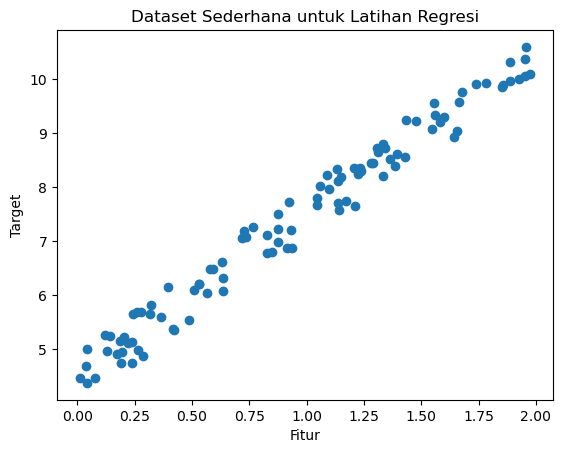

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Buat dataset sederhana
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Fitur
y = 4 + 3 * X + np.random.rand(100, 1)  # Target (dengan sedikit noise)

# Plot dataset
plt.scatter(X, y)
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.title('Dataset Sederhana untuk Latihan Regresi')
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data
model.fit(X, y)

# Koefisien (slope) dan intersep dari model
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print("Koefisien (slope):", slope)
print("Intersep:", intercept)


Koefisien (slope): 2.9682755301018826
Intersep: 4.558080024157022


In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prediksi menggunakan model
y_pred = model.predict(X)

# Menghitung metrik evaluasi regresi
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Cetak hasil evaluasi
print(f"R-squared (R²): {r2:.10f}")   # 10 poin
print(f"Mean Squared Error (MSE): {mse:.10f}")   # 10 poin
print(f"Root Mean Squared Error (RMSE): {rmse:.10f}")   # 10 poin
print(f"Mean Absolute Error (MAE): {mae:.10f}")   # 10 poin
print(f"Mean Absolute Percentage Error (MAPE): {mape:.10f}%")   # 10 poin

R-squared (R²): 0.9746356254
Mean Squared Error (MSE): 0.0762332458
Root Mean Squared Error (RMSE): 0.2761036867
Mean Absolute Error (MAE): 0.2370949851
Mean Absolute Percentage Error (MAPE): 3.4766707777%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


In [4]:
# Muat dataset
wine = load_wine()

# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Inisialisasi dan latih model pohon keputusan
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Accuracy: 0.9444444444
Precision: 0.9513888889
Recall: 0.94444
F1 Score: 0.94486


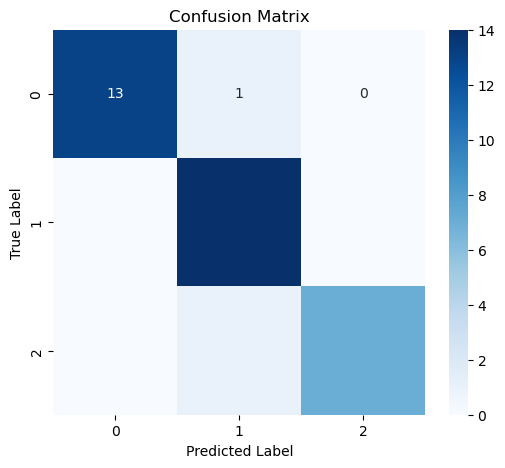

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Prediksi pada data uji
y_pred = clf.predict(X_test)

# Menghitung metrik evaluasi klasifikasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.10f}")   # 10 poin
print(f"Precision: {precision:.10f}")  # 10 poin
print(f"Recall: {recall:.5f}")   # 5 poin
print(f"F1 Score: {f1:.5f}")    # 5 poin

# Plot Confusion Matrix (10 poin)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve (10 poin) - Berlaku untuk masalah biner
if len(set(y_test)) == 2:
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()